In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder
from sklearn.cross_validation import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report , roc_curve , auc , precision_score, recall_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

In [2]:
dataset = pd.read_csv('Datasets/Churn_Modelling.csv')

In [3]:
raw_features = dataset.iloc[:,[3,6,7,8,9,10,11,12]].values
y = dataset.iloc[:,-1].values
country = dataset.iloc[:,4]
gender = dataset.iloc[:,5]

In [4]:
encoder = LabelEncoder()
country , gender = encoder.fit_transform(country) , encoder.fit_transform(gender)
country = country.reshape(-1,1)
hotencoder = OneHotEncoder(categorical_features=[0])
country = hotencoder.fit_transform(country).toarray()

In [5]:
raw_features = np.hstack((raw_features,country))

In [6]:
raw_features = np.hstack((raw_features,gender.reshape(10000,1)))

In [7]:
x_train , x_test , y_train , y_test = train_test_split(raw_features,y,test_size = 0.3)

In [8]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
classifier = LogisticRegression()

In [10]:
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
prediction = classifier.predict(x_test)

In [12]:
classifier.score(x_test,y_test)

0.7956666666666666

In [13]:
cross_validation_score = cross_val_score(classifier,x_test,y_test,cv=10,n_jobs=-1,scoring='accuracy')

In [14]:
np.mean(cross_validation_score)

0.7953377259747331

[[2225  160]
 [ 459  156]]


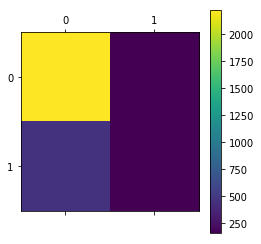

In [53]:
cm = confusion_matrix(y_test,knn_preds)
print(cm)
plt.matshow(cm)
plt.colorbar()

In [16]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.80      1.00      0.89      2385
          1       1.00      0.00      0.01       615

avg / total       0.84      0.80      0.71      3000



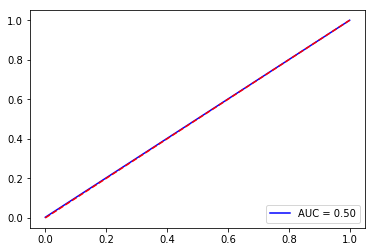

In [17]:
false_positive_rate, recall, thresholds = roc_curve(y_test,prediction)
roc_auc = auc(false_positive_rate, recall)
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' %roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(loc='lower right')


In [25]:
clf2 = KNeighborsClassifier()
clf2.fit(x_train,y_train)
knn_preds = clf2.predict(x_test)

In [26]:
clf2.score(x_test,y_test)

0.7936666666666666

In [30]:
'''pipeline = Pipeline([
                     ('clf',LogisticRegression()),
                     ('clf2',KNeighborsClassifier())
                    ])'''
KNeighborsClassifier()

"pipeline = Pipeline([\n                     ('clf',LogisticRegression()),\n                     ('clf2',KNeighborsClassifier())\n                    ])"

In [48]:
parameters = {
    'n_neighbors':(10,15,20,50),
    #'weigths':('uniform','distance'),
    #'algorithm ': ('ball_tree', 'kd_tree', 'brute'),
    'n_jobs':(-1,1,-2,-3)
    
    
}

In [49]:
grid_search = GridSearchCV(clf2,parameters,cv=10,n_jobs=-1,verbose=1,scoring='accuracy')

In [50]:
grid_search

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': (10, 15, 20, 50), 'n_jobs': (-1, 1, -2, -3)},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [51]:
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    8.8s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': (10, 15, 20, 50), 'n_jobs': (-1, 1, -2, -3)},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [52]:
print ('Best score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
      print ('\t%s: %r' % (param_name, best_parameters[param_name]))
predictions = grid_search.predict(x_test)
print ('Accuracy:', accuracy_score(y_test, predictions))
print ('Precision:', precision_score(y_test, predictions))
print ('Recall:', recall_score(y_test, predictions))

Best score: 0.809
Best parameters set:
	n_jobs: -1
	n_neighbors: 10
Accuracy: 0.8003333333333333
Precision: 0.5563380281690141
Recall: 0.12845528455284552
